<a href="https://colab.research.google.com/github/bmontoyag/UTEC_IA_Fundamentals/blob/main/Proyecto_final/Experimento_2_sin_aumento_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar la biblioteca KaggleHub para interactuar con Kaggle
!pip install -q kagglehub

# Importar las bibliotecas necesarias para la gestión de archivos
import kagglehub
import os

# Descargar el dataset. 'data_dir' contendrá la ruta a la carpeta raíz descargada.
print("Descargando el dataset desde KaggleHub...")
data_dir = kagglehub.dataset_download("muhammadardiputra/potato-leaf-disease-dataset")
print(f"Dataset descargado en: {data_dir}")

# Verificamos el contenido para asegurarnos de la estructura de carpetas
# Esto nos ayuda a construir la ruta completa y correcta en el siguiente paso
print("Contenido de la carpeta descargada:", os.listdir(data_dir))

Descargando el dataset desde KaggleHub...


100%|██████████| 25.2M/25.2M [00:00<00:00, 150MB/s]

Extracting files...


Dataset descargado en: /root/.cache/kagglehub/datasets/muhammadardiputra/potato-leaf-disease-dataset/versions/1
Contenido de la carpeta descargada: ['Potato']


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# --- Parámetros para el procesamiento y entrenamiento ---
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 15

# --- Construir la ruta completa al directorio que contiene Train/Test ---
# Basado en la inspección anterior, añadimos el nombre de la subcarpeta
data_dir_full = os.path.join(data_dir, "Potato")

# --- Cargar los datos de entrenamiento y validación (80/20) ---
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir_full, "Train"),
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="both",
    seed=123
)
train_dataset, validation_dataset = dataset

# --- Cargar los datos de prueba ---
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir_full, "Test"),
    shuffle=False,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Guardar los nombres de las clases (enfermedades)
class_names = train_dataset.class_names
print("\nClases detectadas:", class_names)

# --- Optimización del rendimiento del dataset ---
# Normaliza los valores de los píxeles al rango [0, 1] y usa caché para acelerar la carga
def normalize(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_dataset = train_dataset.map(normalize).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.map(normalize).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(normalize).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

print("\n¡Datos listos para el entrenamiento!")

Found 900 files belonging to 3 classes.
Using 720 files for training.
Using 180 files for validation.
Found 300 files belonging to 3 classes.

Clases detectadas: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

¡Datos listos para el entrenamiento!


In [ ]:
# Versión SIN aumento de datos
# Define input_shape using the IMAGE_SIZE and CHANNELS variables
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),

    # LA LÍNEA DE data_augmentation SE HA ELIMINADO

    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    # Add more layers based on the original model if needed
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    # ... el resto de las capas sigue igual ...
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    # Define num_classes using the number of classes in the dataset
    layers.Dense(len(class_names), activation='softmax')
])

# Compila y entrena este nuevo modelo como antes
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
# The training will be done in the next cell
# history = model.fit(...)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
print("\nIniciando el entrenamiento del modelo...")

history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=validation_dataset,
    verbose=1,
)

print("\n Entrenamiento completado.")


Iniciando el entrenamiento del modelo...
Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 135s 6s/step - accuracy: 0.4531 - loss: 1.2508 - val_accuracy: 0.7667 - val_loss: 0.5860
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 126s 6s/step - accuracy: 0.7852 - loss: 0.4905 - val_accuracy: 0.7556 - val_loss: 0.5289
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 128s 6s/step - accuracy: 0.8384 - loss: 0.3633 - val_accuracy: 0.8611 - val_loss: 0.3219
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 0.9202 - loss: 0.2233 - val_accuracy: 0.8667 - val_loss: 0.3635
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 126s 6s/step - accuracy: 0.9111 - loss: 0.2381 - val_accuracy: 0.9111 - val_loss: 0.1736
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 128s 6s/step - accuracy: 0.9554 - loss: 0.1513 - val_accuracy: 0.9111 - val_loss: 0.1876
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 138s 5s/step - accuracy: 0.9582 - loss: 0.1166 - val_accuracy: 0.8889 - val_loss: 0.3354
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - accuracy: 0.9421

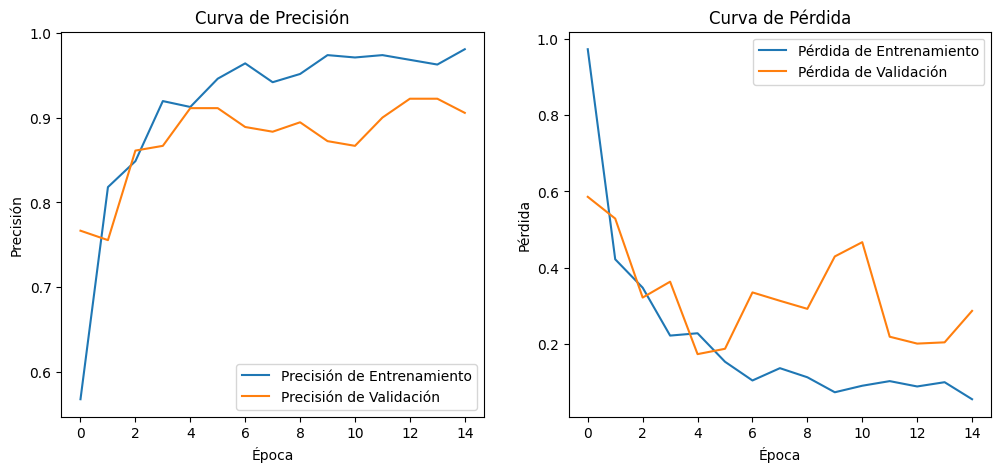


Evaluando el modelo con los datos de prueba...
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9402 - loss: 0.1962

 Precisión final en el conjunto de prueba: 91.33%


In [ ]:
# --- Gráficas de Precisión y Pérdida durante el entrenamiento ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Precisión de Entrenamiento')
plt.plot(range(EPOCHS), val_acc, label='Precisión de Validación')
plt.legend(loc='lower right')
plt.title('Curva de Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Pérdida de Entrenamiento')
plt.plot(range(EPOCHS), val_loss, label='Pérdida de Validación')
plt.legend(loc='upper right')
plt.title('Curva de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

# --- Evaluación final con el conjunto de prueba ---
print("\nEvaluando el modelo con los datos de prueba...")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"\n Precisión final en el conjunto de prueba: {test_acc*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


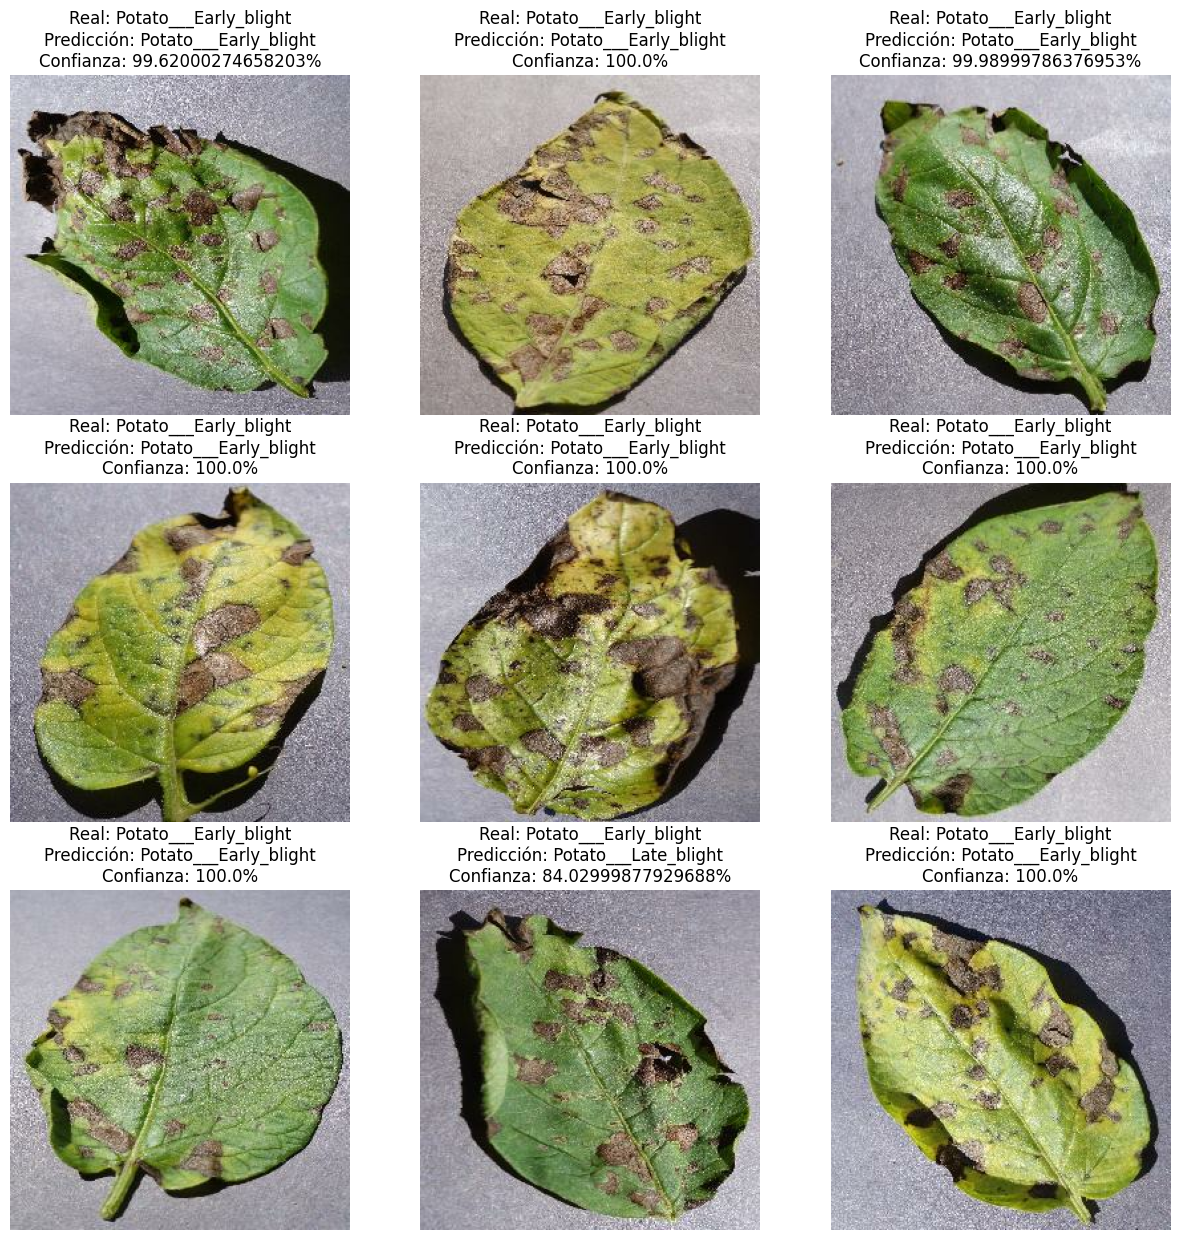

In [ ]:
import numpy as np

# --- Función para predecir una sola imagen ---
def predict_image(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Crear un lote de una sola imagen

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

# --- Visualizar predicciones en un conjunto de imágenes de prueba ---
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):  # Mostramos las primeras 9 imágenes
        ax = plt.subplot(3, 3, i + 1)
        # Unnormalize images before displaying
        plt.imshow((images[i].numpy() * 255).astype("uint8"))

        predicted_class, confidence = predict_image(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Real: {actual_class}\nPredicción: {predicted_class}\nConfianza: {confidence}%")
        plt.axis("off")